# INTRODUCTION

Project Title: Brain Tumor Detection using Convolutional Neural Networks (CNN)
Introduction:
Brain tumors are abnormal growths of cells in the brain that can be malignant (cancerous) or benign (non-cancerous). These tumors can cause various neurological problems depending on their size, type, and location in the brain. Early detection of brain tumors is crucial for effective treatment and better prognosis. Magnetic Resonance Imaging (MRI) is one of the most commonly used techniques for diagnosing brain tumors, as it provides detailed images of the brain's internal structure.

Aim:
The primary aim of this project is to develop a machine learning model using Convolutional Neural Networks (CNN) to automatically detect and classify brain tumors from MRI scans.

Objective:
To preprocess MRI images of the brain for optimal input into the CNN model.
To design and implement a CNN model that can distinguish between MRI scans with tumors and those without.
To evaluate the performance of the model using appropriate metrics such as accuracy, precision, and recall.

In [2]:
# importing liberaries
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
from pathlib import Path
from PIL import Image

## UPLOADING AND VIEWING THE DATASET 

In [9]:
path = Path('./brain_tumor_dataset/yes')
tumors =[]

for file in list(path.glob('*.jpg')) + list(path.glob('*.JPG')):
    img = Image.open(file)
    img = img.resize((128, 128))
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = np.array(img)
    
    tumors.append(img)
    print(img.shape)
    

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [10]:
tumors = np.array(tumors)
tumors.shape

(154, 128, 128, 3)

In [11]:
path = Path('./brain_tumor_dataset/no')

healthy = []
for file in list(path.glob('*.jpg')) + list(path.glob('*.JPG')):
    img = Image.open(file)
    img = img.resize((128, 128))
    if img.mode != 'RGB':
        img = img.convert('RGB')
    img = np.array(img)
    healthy.append(img)
    print(img.shape)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [12]:
healthy = np.array(healthy)
healthy.shape

(91, 128, 128, 3)

In [13]:
healthy[0].shape, tumors.shape

((128, 128, 3), (154, 128, 128, 3))

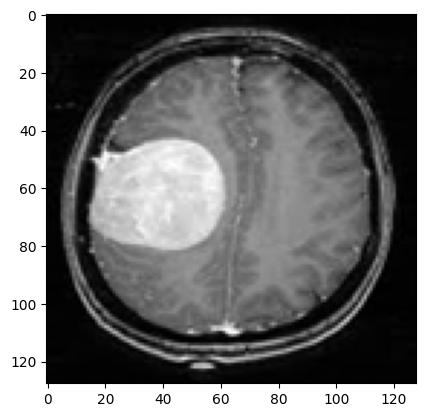

In [14]:
plt.imshow(tumors[0])


In [15]:
len(healthy)

91

91


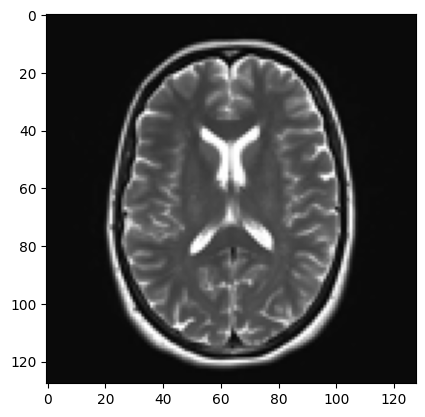

In [16]:
print(len(healthy))
plt.imshow(healthy[54])

[24 16 34  1 14]
[  4 124  63  84  93]


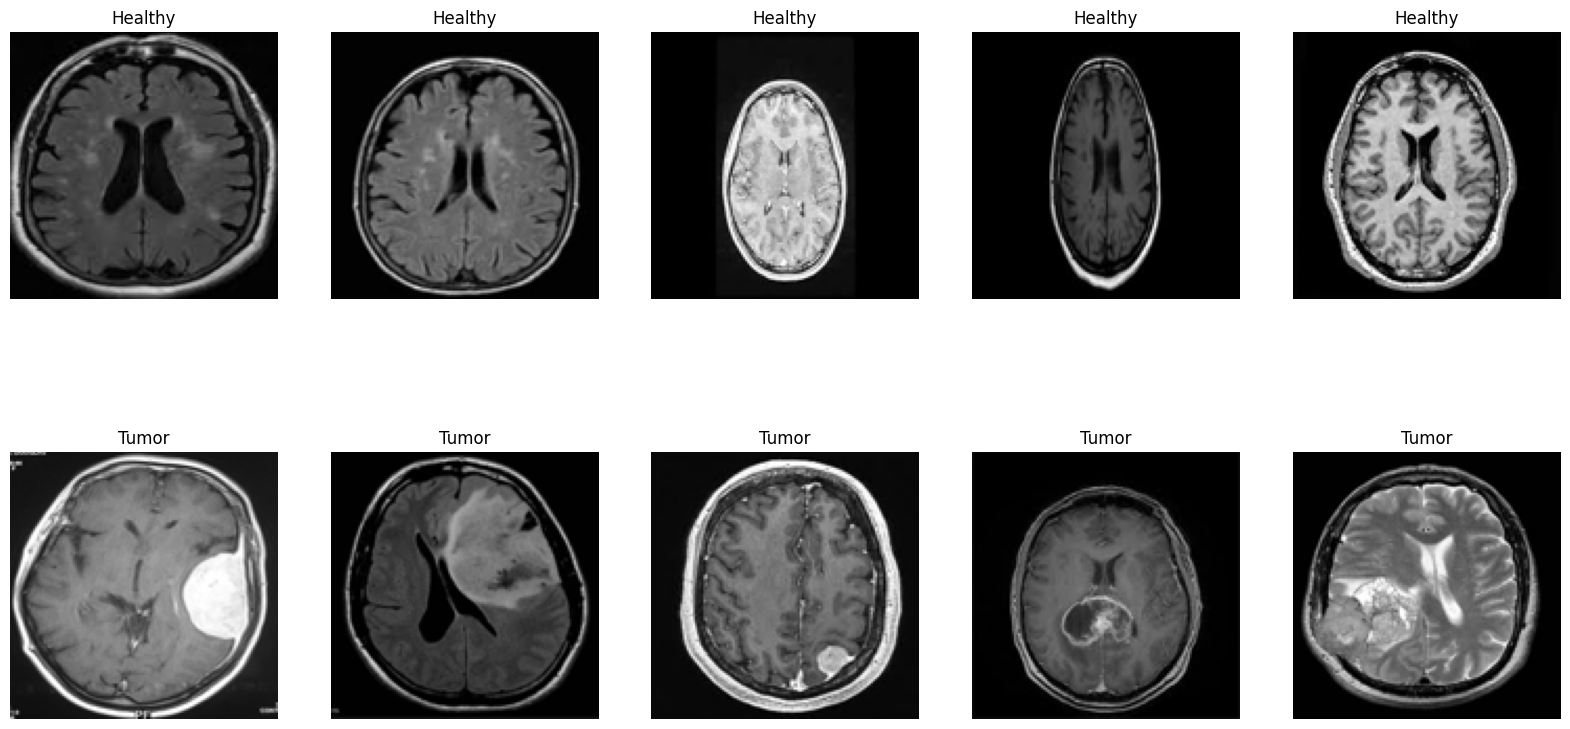

In [17]:
def image_pictures(healthy,tumors,num=5):
    healthy_images = np.random.choice(len(healthy), num, replace=False) 
    tumor_images = np.random.choice(len(tumors), num, replace=False)
    print(healthy_images)
    print(tumor_images)

    fig, axes = plt.subplots(2, num, figsize=(20, 10))
    for i,(img1,img2 )in enumerate(zip(healthy_images,tumor_images)):
        axes[0,i].imshow(healthy[img1])
        axes[0,i].axis('off')
        axes[0,i].set_title('Healthy')
        axes[1,i].imshow(tumors[img2])
        axes[1,i].axis('off')
        axes[1,i].set_title('Tumor')
    plt.show()

image_pictures(healthy,tumors)


**PREPARING THE DATA**

In [100]:
class MRI(Dataset):
    def __init__(self):
        path_healthy = Path('./brain_tumor_dataset/no')
        path_tumor = Path('./brain_tumor_dataset/yes')
        self.healthy = []
        self.tumor = []
        
        self.mode = None
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None

       

        for file in list(path_healthy.glob('*.jpg')) + list(path_healthy.glob('*.JPG')):
            img = Image.open(file)
            img = img.resize((128, 128))
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img = np.array(img)
            img = img.reshape(img.shape[2], img.shape[0], img.shape[1])
            self.healthy.append(img)

        for file in list(path_tumor.glob('*.jpg')) + list(path_tumor.glob('*.JPG')):
            img = Image.open(file)
            img = img.resize((128, 128))
            if img.mode != 'RGB':
                img = img.convert('RGB')
            img = np.array(img)
            img = img.reshape(img.shape[2], img.shape[0], img.shape[1])
            self.tumor.append(img)
        healthy = np.array(self.healthy)
        tumor = np.array(self.tumor)
        healthy_lebel = np.zeros(healthy.shape[0], dtype='int32')
        tumor_lebel = np.ones(tumor.shape[0], dtype='int32')
        self.Img = np.concatenate((healthy, tumor), axis=0, dtype='int32')
        self.Label = np.concatenate((healthy_lebel, tumor_lebel), axis=0, dtype='int32')

    def slipting_data(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.Img, self.Label, test_size=0.2, random_state=42)
   
    def __getitem__(self, index):
        if self.mode == 'Train':
            return {'Image': self.X_train[index], 'Label': self.y_train[index]}
        elif self.mode == 'Test':
            return {'Image': self.X_test[index], 'Label': self.y_test[index]}
        else:
            return {'Image': self.Img[index], 'Label': self.Label[index]}
    
    def __len__(self):
        if self.mode == 'Train':
            return self.X_train.shape[0]
        elif self.mode == 'Test':
            return self.X_test.shape[0]
        else :
            return self.Img.shape[0]
        
    
    def __normalize__(self):
        self.Img = self.Img / 255.0

In [101]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [102]:

mri = MRI()
mri.__normalize__()
mri.slipting_data()
train_loader = DataLoader(mri, batch_size=10, shuffle=True)
test_loader = DataLoader(mri, batch_size=10, shuffle=False)

In [103]:
len(mri.y_test), len(mri.X_test)

(49, 49)

In [104]:
mri.mode = 'Train'
mri[2]

{'Image': array([[[0.47843137, 0.47843137, 0.47843137, ..., 0.05882353,
          0.05490196, 0.05490196],
         [0.05490196, 0.05490196, 0.05490196, ..., 0.05882353,
          0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05490196, ..., 0.04705882,
          0.04705882, 0.04705882],
         ...,
         [0.39215686, 0.39215686, 0.38431373, ..., 0.0627451 ,
          0.0627451 , 0.0627451 ],
         [0.05882353, 0.05882353, 0.05882353, ..., 0.39607843,
          0.4       , 0.4       ],
         [0.4       , 0.38039216, 0.38039216, ..., 0.31372549,
          0.31372549, 0.4       ]],
 
        [[0.4       , 0.4       , 0.50588235, ..., 0.0627451 ,
          0.0627451 , 0.0627451 ],
         [0.05882353, 0.05882353, 0.05882353, ..., 0.40392157,
          0.40392157, 0.40392157],
         [0.40392157, 0.36470588, 0.36470588, ..., 0.2627451 ,
          0.2627451 , 0.49019608],
         ...,
         [0.31372549, 0.30588235, 0.30588235, ..., 0.83137255,
          0.831

**BUILDING THE ALGORITHM**

In [105]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(nn.Conv2d(3, 32, kernel_size=3, stride=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)
                                   ,nn.Conv2d(32, 64, kernel_size=3, stride=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),
                                   nn.Conv2d(64, 128, kernel_size=3, stride=1), nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Sequential(nn.Linear(128*14*14, 128), nn.ReLU(), nn.Linear(128, 56), nn.ReLU(), nn.Linear(56, 1))

    
    def forward(self, x):
        x = self.conv1(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x= F.sigmoid(x)
        return x

In [106]:
torch.manual_seed(42)
model = CNN().to(device)

In [107]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


## TRAINING AND VALIDATING THE MODEL

In [108]:
epochs = 1000
Avg_train_loss = []
Avg_test_loss = []
Avg_train_accuracy = []
Avg_test_accuracy = []
total_correct_train = 0
total_correct_test = 0
pateince = 10
best_loss = float('inf')
pateince_counter = 0
for epoch in range(epochs):
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    correct_train = 0
    correct_test = 0
    model.train()
    mri.mode = 'Train'
    for i, data in enumerate(train_loader):
        inputs = data['Image'].to(device, dtype=torch.float)
        labels = data['Label'].to(device, dtype=torch.float)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        train_loss.append(loss.item())
        predicted = torch.round(outputs)
        correct = (predicted.squeeze() == labels).sum().item()
        correct_train += correct
        accuracy = accuracy_score(labels.cpu().detach().numpy(), predicted.cpu().detach().numpy())
        train_accuracy.append(accuracy)

    Avg_train_loss.append(np.mean(train_loss))
    Avg_train_accuracy.append(np.mean(train_accuracy))

    total_correct_train += correct_train


    model.eval()
    mri.mode = 'Test'
    with torch.no_grad():
        for i, data in enumerate(test_loader):
            inputs = data['Image'].to(device, dtype=torch.float)
            labels = data['Label'].to(device, dtype=torch.float)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            test_loss.append(loss.item())
            predicted = torch.round(outputs)
            correct = (predicted.squeeze() == labels).sum().item()
            correct_test += correct

            accuracy = accuracy_score(labels.cpu().numpy(), predicted.cpu().numpy())
            test_accuracy.append(accuracy)

    Avg_test_loss.append(np.mean(test_loss))
    Avg_test_accuracy.append(np.mean(test_accuracy))
    total_correct_test += correct_test

    if (epoch +1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{epochs}, Train Loss: {np.mean(train_loss):.4f}, Train Accuracy: {np.mean(train_accuracy):.4f}, Test Loss: {np.mean(test_loss):.4f}, Test Accuracy: {np.mean(test_accuracy):.4f}')
  
    if np.mean(test_loss) <  best_loss:
        best_loss = np.mean(test_loss)
        pateince_counter = 0
    else:
        pateince_counter += 1
        if pateince_counter == pateince:
            print('Early Stopping')
            break

    

Epoch: 10/1000, Train Loss: 0.3658, Train Accuracy: 0.8667, Test Loss: 0.5520, Test Accuracy: 0.6756
Early Stopping


In [110]:
correct_test

37

In [111]:
mri.X_test.shape

(49, 3, 128, 128)

**CONFUSION MATRIX OF THE BUILT ALGORITHM**

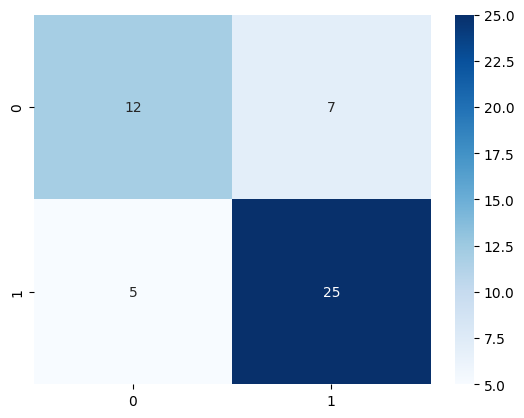

In [112]:
plt.figure()
sns.heatmap(confusion_matrix(mri.y_test, torch.round(model(torch.tensor(mri.X_test).to(device, dtype=torch.float)).cpu().detach()).numpy()), annot=True, fmt='d', cmap='Blues')
plt.show() 

**MODEL EVALUATION**

In [113]:
accuracy = accuracy_score(mri.y_test, torch.round(model(torch.tensor(mri.X_test).to(device, dtype=torch.float)).cpu().detach()).numpy())
precision = precision_score(mri.y_test, torch.round(model(torch.tensor(mri.X_test).to(device, dtype=torch.float)).cpu().detach()).numpy())
recall = recall_score(mri.y_test, torch.round(model(torch.tensor(mri.X_test).to(device, dtype=torch.float)).cpu().detach()).numpy())
f1 = f1_score(mri.y_test, torch.round(model(torch.tensor(mri.X_test).to(device, dtype=torch.float)).cpu().detach()).numpy())
print(f'Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}')


Accuracy: 0.7551, Precision: 0.7812, Recall: 0.8333, F1: 0.8065
